# Multivariate California Housing Analysis Using K-Means and DBSCAN

## 1.0 Business understanding

### 1.1 Business objective

### 1.2 Situational assessment

**Research Question #1:**

Are there distinct clusters of California housing?

**Hypothesis Couplet**

Null Hypothesis (H<sub>0</sub>): •	There are no differentiated clusters of California housing.


Alternate Hypothesis (H<sub>1</sub>): There are differentiated clusters of California housing.


## 2.0 Data Understanding

### 2.1 Prelimary data analysis

#### 2.1.1 Data mining goals

#### 2.1.2 Import libraries

In [41]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import numpy as np
import seaborn as sns
import itertools
import warnings

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_score as ss
from sklearn.decomposition import PCA
from IPython.display import clear_output

#### 2.1.3 Suppress warnings

In [43]:
warnings.filterwarnings('ignore')

#### 2.1.4 Data ingestion

In [44]:
df = pd.read_csv('sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


#### 2.1.5 Data description

**High Level Data Dictionary**

* Longitude
* Latitude
* Housing median age
* Total rooms
* Total bedrooms
* Population
* Households
* Median income
* Median house value

In [45]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2.2 Data quality

#### 2.2.1 Check for missing values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


There are no missing values.

#### 2.2.2 Check for outliers

In [47]:
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [48]:
feature_df = df.copy()

In [49]:
rows, cols = 3, 3
num_columns = len(feature_df.columns)
num_plots = min(rows * cols, num_columns)

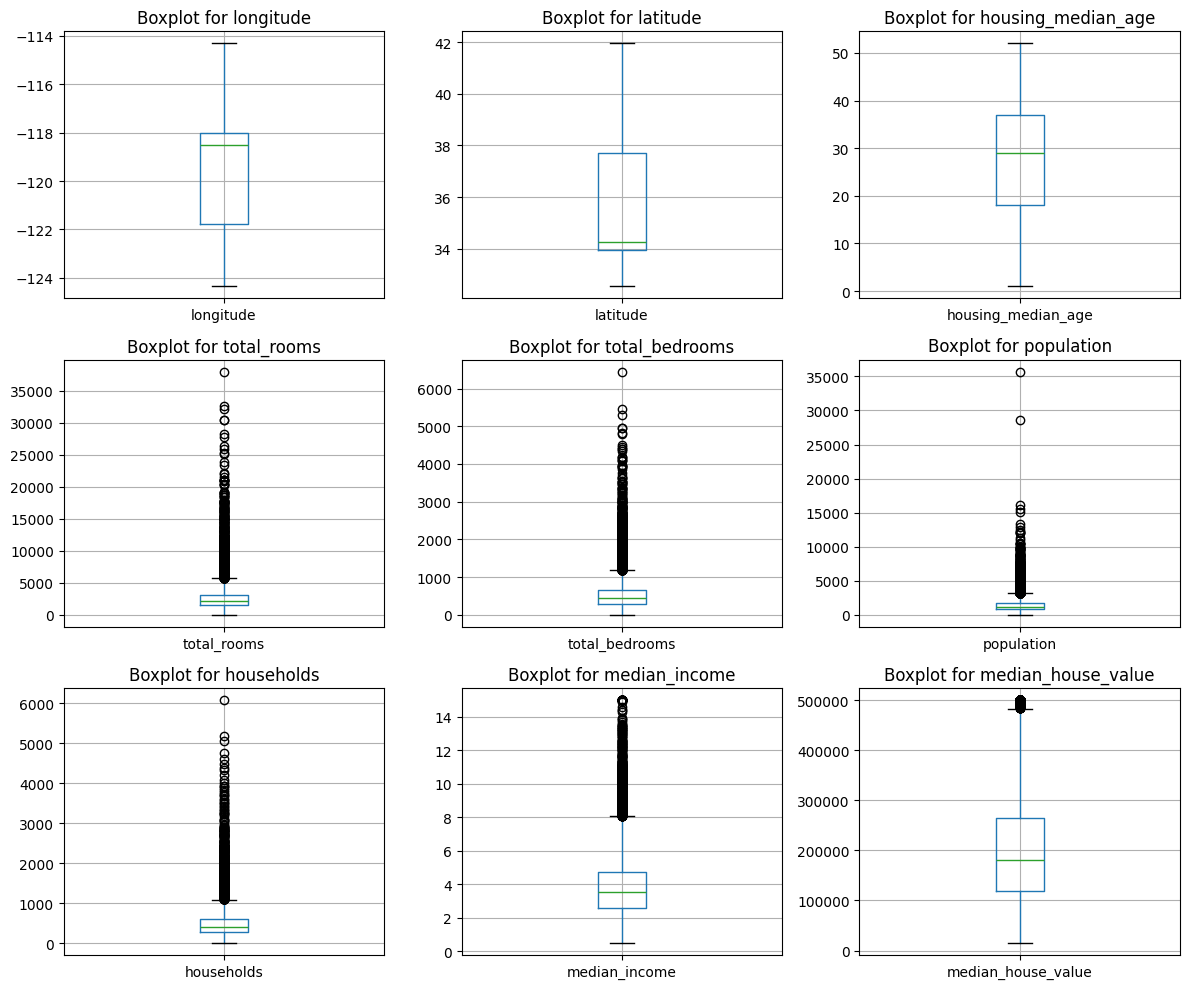

In [50]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.boxplot(column=column, ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Six of the nine variables contain outliers.

#### 2.2.3 Check for duplicates

In [51]:
df.duplicated().sum()

np.int64(0)

There are no duplicate rows.

### 2.3 Exploratory data analysis

#### 2.3.1 Check distributions of numeric variables

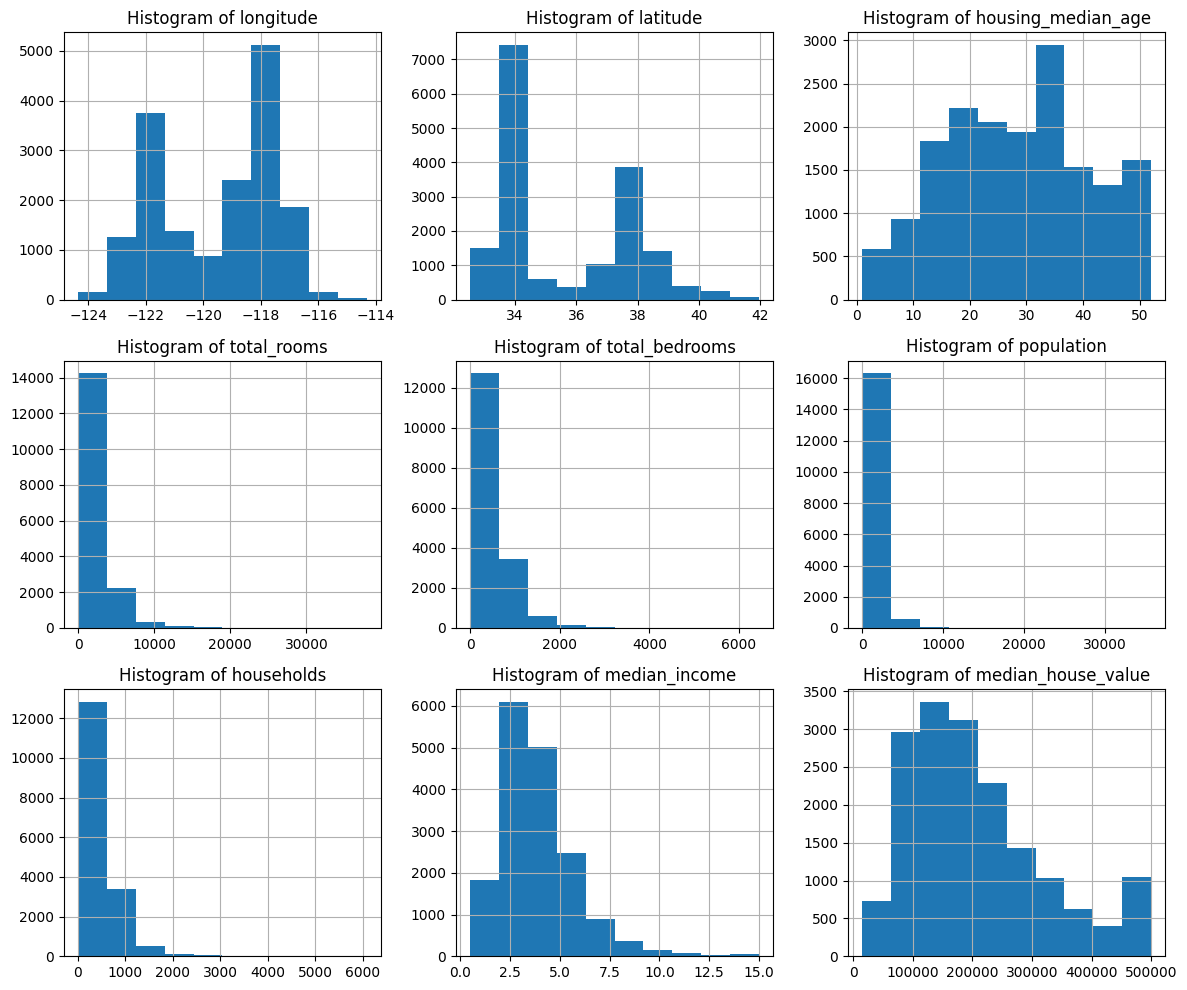

In [52]:
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(feature_df.columns[:rows * cols]):
    feature_df.hist(column=column, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

for j in range(num_plots, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The data is bimodal and skewed to the right.

#### 2.3.2 Check density of numeric variables

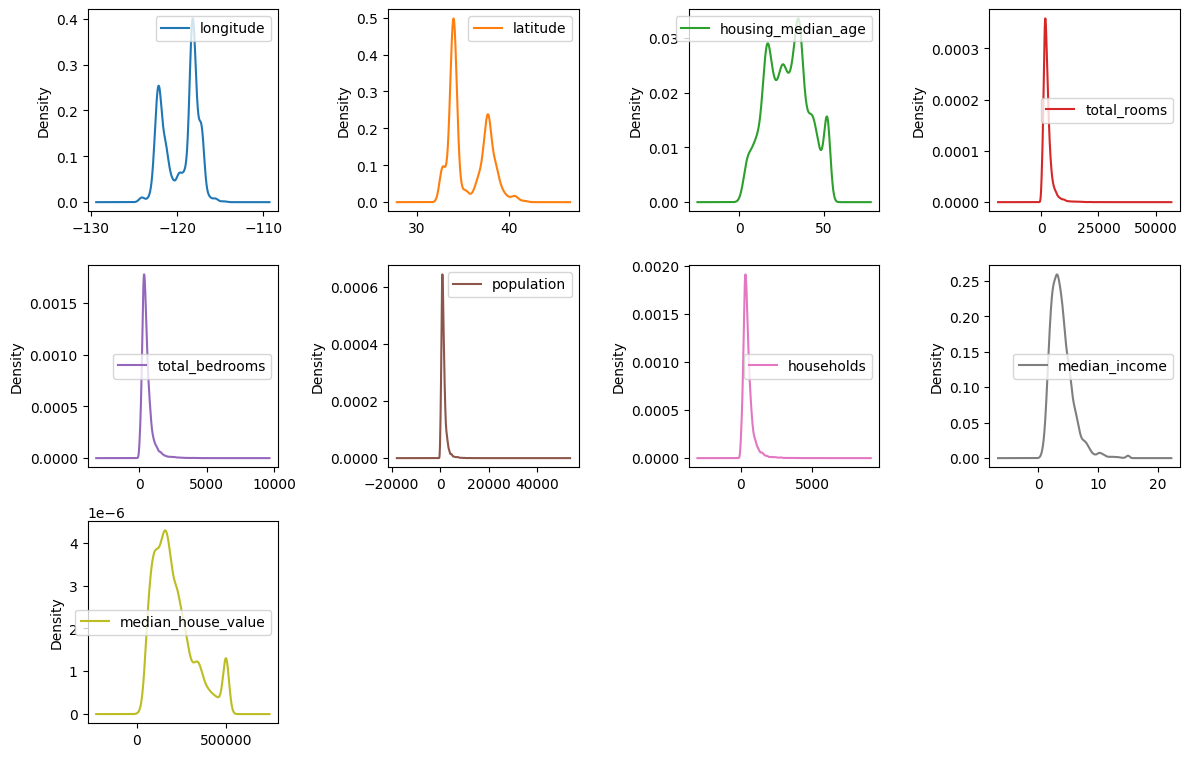

In [53]:
feature_df.plot(kind='density', subplots=True, layout=(4,4), figsize=(12,10), sharex=False)

plt.tight_layout()
plt.show()

#### 2.3.3 Check corrleations of numeric variables

<Axes: >

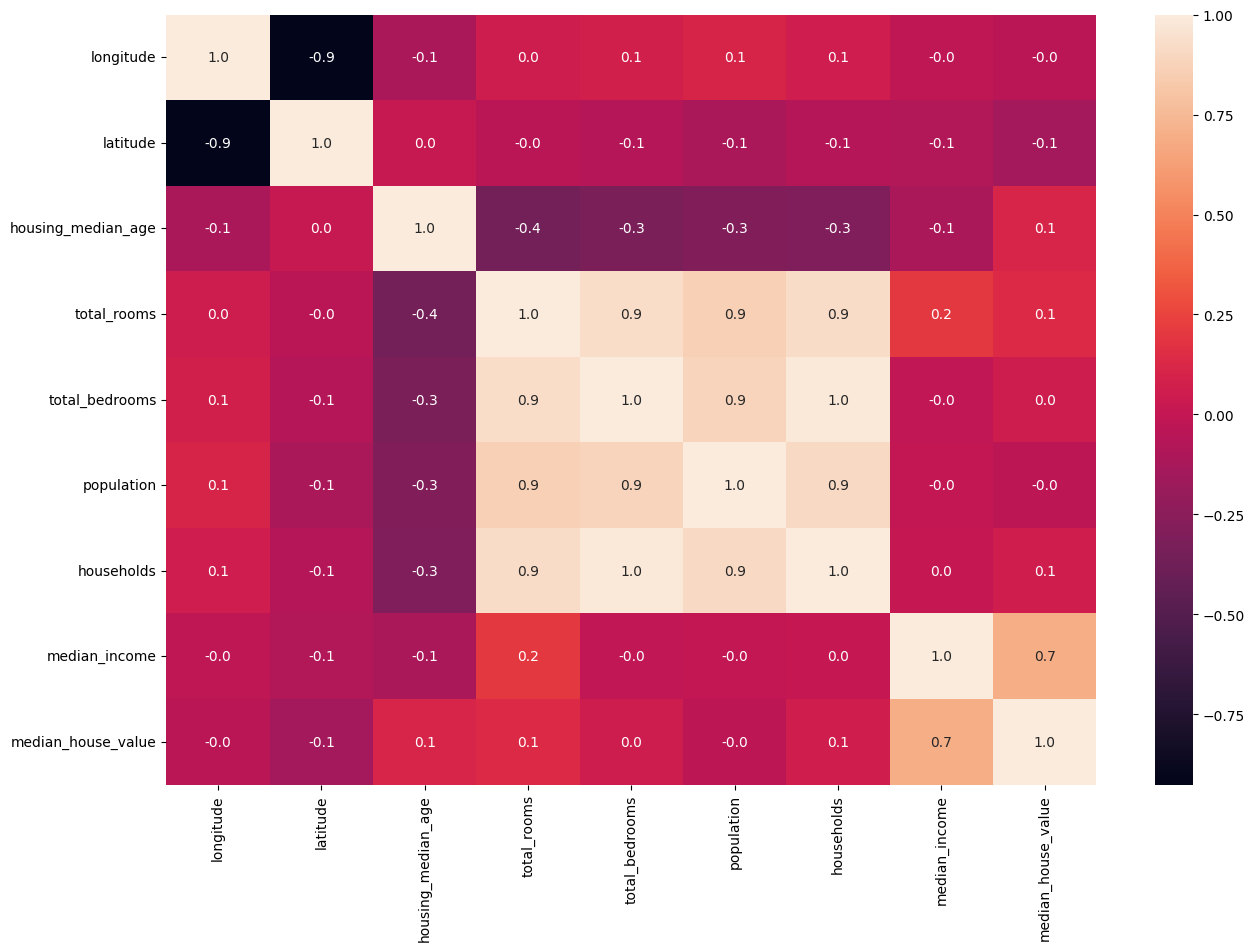

In [54]:
plt.figure(figsize=[15,10],facecolor='white')
sns.heatmap(feature_df.corr(), annot=True, fmt=".1f")

Median income and median house value are moderately correlated. Total rooms, total bedrooms, population, and households are all highly corretlated.

## 3.0 Data preprocessing

### 3.1 Data cleansing

#### 3.1.1 No missing values

#### 3.1.2 No duplicate rows

#### 3.1.1 No highly correlated features

### 3.2 Feature engineering

### 3.3 Data partitioning

### 3.4 Data transformation

#### 3.4.1 Scale numeric variables

In [55]:
data = df.drop(columns=['longitude', 'latitude', 'population', 'total_bedrooms'])

In [56]:
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1

In [57]:
data.describe()

,housing_median_age,total_rooms,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,5.868709,1.626729,1.740338,3.100185,4.568474
std,2.221224,0.517188,0.569098,1.184357,2.152267
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,1.346382,1.415886,2.282622,2.937330
50%,5.941176,1.504152,1.603848,2.889788,4.069284
75%,7.352941,1.747153,1.894302,3.648508,5.639175
max,10.000000,10.000000,10.000000,10.000000,10.000000


### 3.5 Parameter identification

#### 3.5.1 Determine number of clusters for k-means

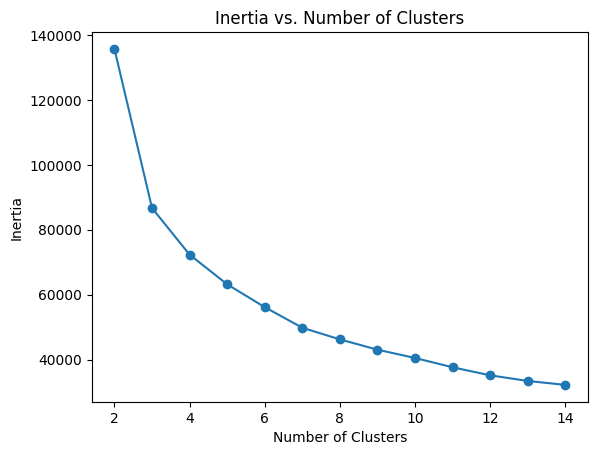

In [58]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(data)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.plot(clusters_range,inertias, marker='o')
plt.show()

Based on the elbow method, three clusters are selected for k-means.

#### 3.5.2 Determine optimum epsilon and minimum saples for DBSCAN

In [59]:
x = data.to_numpy()

In [60]:
epsilons  = np.linspace(0.01, 1, num = 15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [61]:
min_samples = np.arange(2, 20, step = 3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [62]:
combinations = list (itertools.product(epsilons, min_samples))
N = len(combinations)
N

90

In [63]:
def get_scores_and_labels(combinations, x):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(x)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 100):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(x, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_score = scores[best_index]
  best_labels = all_labels_list[best_index]

  return {'best_epsilon': best_parameters[0], 'best_min_samples': best_parameters[1], 'best_score': best_score, 'best_labels': best_labels}

best_dict = get_scores_and_labels(combinations, x)

Index: 0, Score: -0.31467710598682763, Labels: [-1 -1 -1 ... -1 -1 -1], NumClusters: 2
Combination (np.float64(0.01), np.int64(5)) on iteration 2 of 90 has 0 clusters. Moving on
Combination (np.float64(0.01), np.int64(8)) on iteration 3 of 90 has 0 clusters. Moving on
Combination (np.float64(0.01), np.int64(11)) on iteration 4 of 90 has 0 clusters. Moving on
Combination (np.float64(0.01), np.int64(14)) on iteration 5 of 90 has 0 clusters. Moving on
Combination (np.float64(0.01), np.int64(17)) on iteration 6 of 90 has 0 clusters. Moving on
Combination (np.float64(0.08071428571428571), np.int64(2)) on iteration 7 of 90 has 298 clusters. Moving on
Combination (np.float64(0.08071428571428571), np.int64(5)) on iteration 8 of 90 has 0 clusters. Moving on
Combination (np.float64(0.08071428571428571), np.int64(8)) on iteration 9 of 90 has 0 clusters. Moving on
Combination (np.float64(0.08071428571428571), np.int64(11)) on iteration 10 of 90 has 0 clusters. Moving on
Combination (np.float64(0.0

In [64]:
best_dict

{'best_epsilon': np.float64(1.0),
 'best_min_samples': np.int64(17),
 'best_score': np.float64(0.36287426070903434),
 'best_labels': array([0, 0, 0, ..., 0, 0, 0])}

In [65]:
df['cluster'] = best_dict['best_labels']

In [66]:
df['cluster'].value_counts()

,count
cluster,
0,16596
-1,383
1,19
2,2


## 3.0 Modeling

### 3.1 K-means and DBSCAN models of California housing markets

#### 3.1.1 Functions for housing market analysis

In [67]:
data_housing = data.to_numpy()

In [68]:
def label_generation(data_housing, var_eps, var_samples, var_clusters):
  kmeans_labels = KMeans(n_clusters=var_clusters, random_state=42).fit_predict(data_housing)
  dbscan_labels = DBSCAN(eps=var_eps, min_samples=var_samples).fit_predict(data_housing)
  return kmeans_labels, dbscan_labels

In [69]:
def cluster_plotting(data, kmeans_labels, dbscan_labels, title):
    from sklearn.decomposition import PCA

    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=kmeans_labels, cmap='tab10', s=10)
    plt.title('K-Means Clustering')

    plt.subplot(1, 2, 2)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=dbscan_labels, cmap='Set1', s=10)
    plt.title('DBSCAN Clustering')

    plt.suptitle(title)
    plt.show()

#### 3.1.2 Parameter settings and label generation

In [70]:
var_eps = 1.0
var_samples = 17
var_clusters = 3

In [71]:
kmeans_labels, dbscan_labels = label_generation(data_housing, var_eps, var_samples, var_clusters)

#### 3.1.3 Cluster plots

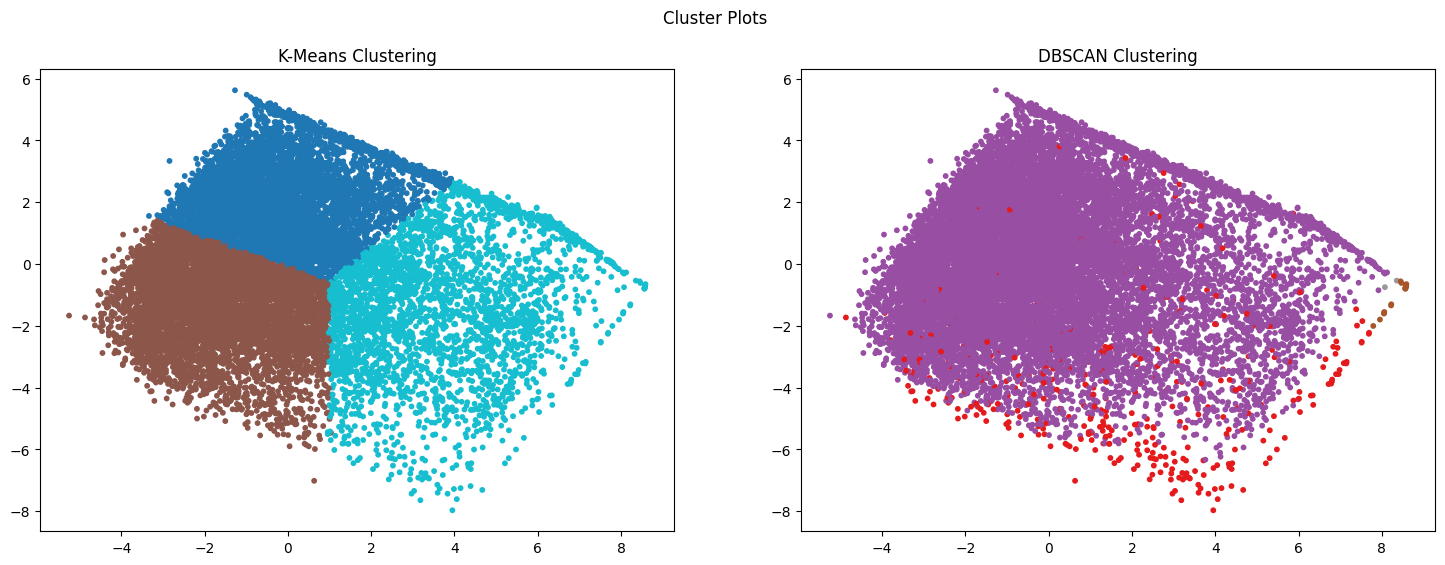

In [72]:
cluster_plotting(data_housing, kmeans_labels, dbscan_labels, 'Cluster Plots')

#### 3.1.4 Append labels to dataframe

In [73]:
df['db_cluster'] = dbscan_labels
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,db_cluster
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,0,0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,0,0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,0,0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,0,0


In [74]:
df['km_cluster'] = kmeans_labels
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,cluster,db_cluster,km_cluster
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0,0,1
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0,0,1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0,0,1
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0,0,1
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,0,0,0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,0,0,0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,0,0,1
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,0,0,1


#### 3.1.5 K-means cluster counts

In [75]:
df['km_cluster'].value_counts()

,count
km_cluster,
1,6896
0,6895
2,3209


#### 3.1.6 DBSCAN cluster counts

In [76]:
df['db_cluster'].value_counts()

,count
db_cluster,
0,16596
-1,383
1,19
2,2


#### 3.1.7 K-means plot of California housing markets

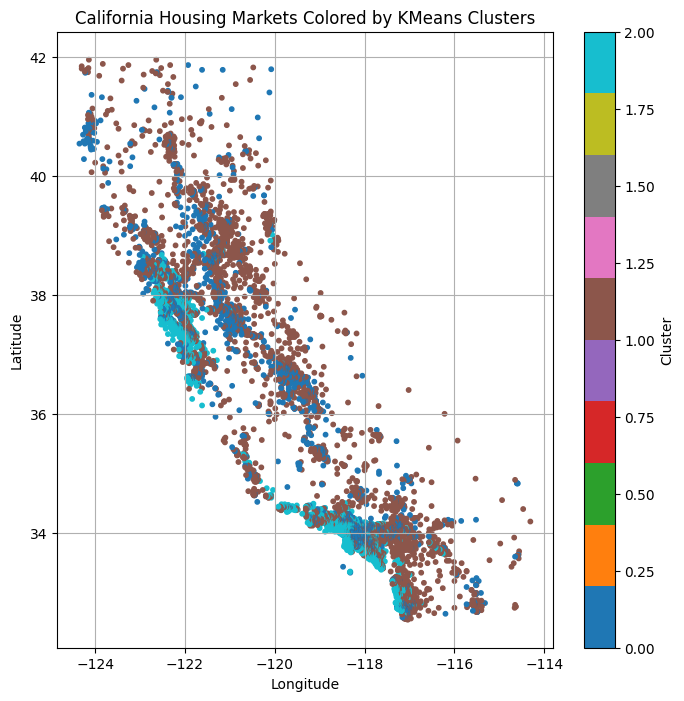

In [77]:
plt.figure(figsize=(8, 8))  # size in inches
scatter = plt.scatter(x = df["longitude"] , y = df["latitude"], c=df["km_cluster"], s=10, cmap="tab10") #, alpha=0.7

plt.title("California Housing Markets Colored by KMeans Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

#### 3.1.8 DBSCAN plot of California housing markets

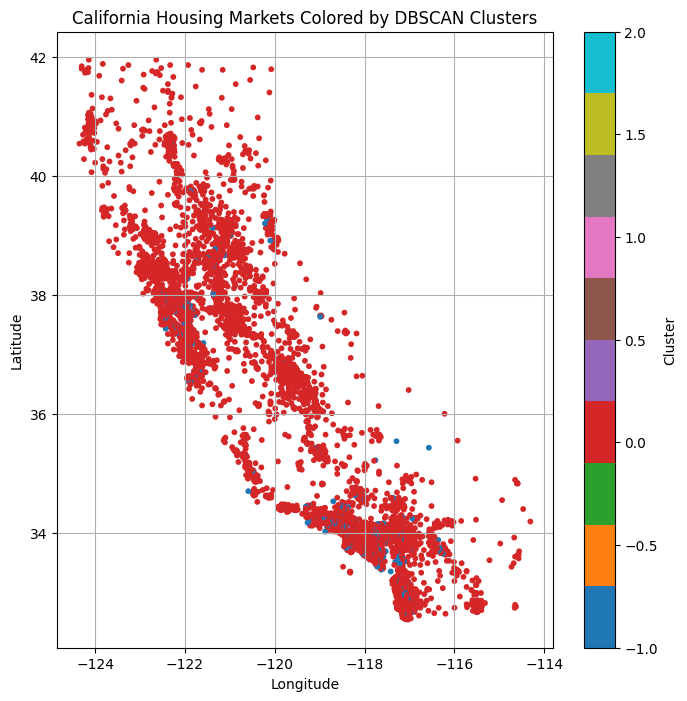

In [78]:
plt.figure(figsize=(8, 8))  # size in inches
scatter = plt.scatter(x = df["longitude"] , y = df["latitude"], c=df["db_cluster"], s=10, cmap="tab10") #, alpha=0.7

plt.title("California Housing Markets Colored by DBSCAN Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

## 4.0 Evaluation

### 4.1 K-means silhouette score

In [79]:
ss(data_housing, df['km_cluster'])

np.float64(0.35148342839483604)

### 4.2 DBSCAN silhouette score

In [80]:
ss(data_housing, df['db_cluster'])

np.float64(0.36287426070903434)

## 7.0 Deployment

Paper: ComfortJDDS8536-1 - K-means and DBSCAN Clustering Analysis of Gold Prices and California Housing Markets